## RH - Human Resource Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Import data

In [2]:
hr = pd.read_csv('HR-Employees.csv')

### Create a report with panas-profiling

In [3]:
# Instalation of pandas-profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# pip install pandas-profiling[notebook]

In [4]:
profile = ProfileReport(hr, title="Report - Pandas Profiling", html={"style":{"full_width":True}})

In [5]:
# Save report to html file#
# profile.to_file(output_file="Relatorio.html")

### Check data / clear data

In [6]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
hr['Retention'] = hr['Attrition'].map({'No':'Stay', 'Yes':'Left'})

In [8]:
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Cheke for any missing value in the data
hr.isnull().values.any()

False

In [10]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [46]:
# Remove unnecessary conlumns
del hr['Over18']
del hr['StandardHours']
del hr['EmployeeCount']

In [11]:
# hr['EmployeeNumber'].groupby(['Attrition'])
Attrition = hr['Attrition'].groupby(hr['Attrition']).count()
Attrition

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

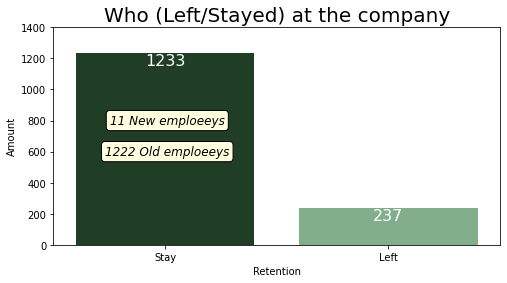

In [253]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0.2, light=4, reverse=True)

y = Attrition

sns.countplot(x = hr['Retention'].sort_values(ascending=False), palette=palette)
plt.title('Who (Left/Stayed) at the company', fontsize=20)

plt.ylim(0, 1400)
plt.ylabel('Amount')
# plt.axhline(y=1222, xmin=0.1, xmax=0.9, color='red')

plt.text(0.01, 800, "11 New emploeeys", size=12, ha="center", va="center", style='italic',
         bbox=dict(boxstyle="round", facecolor='lightyellow'))
plt.text(0.01, 600, "1222 Old emploeeys", size=12, ha="center", va="center", style='italic',
         bbox=dict(boxstyle="round", facecolor='lightyellow'))

for i in range(2):
    y[i] = y[i].astype("int32")
    plt.text(i, y[i], y[i], ha="center", va="top", color="white", fontsize=16)
    

plt.show()

In [63]:
# Number of new emploeeys
hr[hr.TotalWorkingYears == 0]['EmployeeNumber'].count()

11

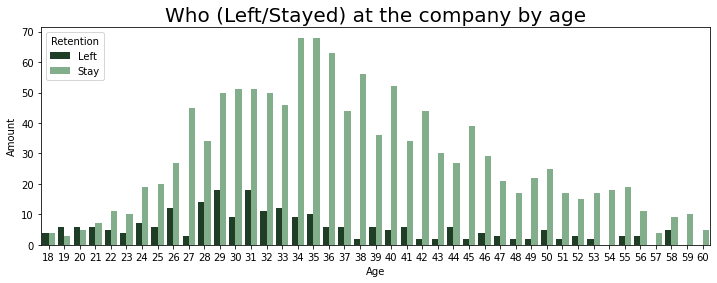

In [254]:
fig, ax = plt.subplots(figsize=(12, 4))
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0.2, light=4, reverse=True)
sns.countplot(x='Age', hue='Retention', data=hr, palette=palette)
plt.title('Who (Left/Stayed) at the company by age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()